In [4]:
# imports
import pandas as pd
import numpy as np

In [5]:
# NOTE WHAT COLUMN TO INCLUDE AND WHAT NOT TO INCLUDE

C Column 
- can be 0 and less than 0, no dash
- S can be 0 CANNOT be less than 0, no dash
- T3-T5 --> can be 0, and less than 0, no dash
- T1 --> CANNOT be 0, less than 0, no dashes 
- T2 --> CANNOT be 0, less than 0, no dashes
- P --> CANNOT be 0, less than 0, no dashes

In [6]:
# read in the whole file and '-' as NA values 
data = pd.read_excel('Competition1_raw_data.xlsx', na_values=r'-')
                    #dtype={'P(IPO)': float, 'P(1Day)': float})
# define dashes as missing --> 0 or NaN
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [7]:
# replace with nan
data.loc[(data['S1'] < 0),'S1'] = np.nan
data.loc[(data['T2'] == 0),'T2'] = np.nan
data.loc[(data['T5'] < 0),'T5'] = np.nan

# drop - for P values 
data.dropna(subset=['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'], inplace=True)

# impute 
data['S1'] = data['S1'].fillna(data['S1'].median())
data['T2'] = data['T2'].fillna(data['T2'].median())
data['T5'] = data['T5'].fillna(data['T5'].median())
data['C3_impute'] = data['C3'].fillna(data['C3'].median())
data['C7_impute'] = data['C7'].fillna(data['C7'].median())

# exclude not imputed C3 and C7
data = data[['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2',
       'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3',
       'C3_impute', 'C7_impute']]

In [8]:
data.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C4',
       'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3_impute',
       'C7_impute'],
      dtype='object')

In [9]:
# P's are taken care off 
# S taken care off 
# T taken care off 
# C taken care off 

In [10]:
data[data['T5']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 22 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
dtypes: float64(19), object(3)
memory usage: 118.6+ KB


In [12]:
data.isnull().sum()

I1           0
I2           0
I3           0
P(IPO)       0
P(H)         0
P(L)         0
P(1Day)      0
C1           0
C2           0
C4           0
C5           0
C6           0
T1           0
T2           0
T3           0
T4           0
T5           0
S1           0
S2           0
S3           0
C3_impute    0
C7_impute    0
dtype: int64

In [13]:
data[data['P(1Day)']<0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute


In [14]:
data[data['P(1Day)']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,T1,T2,T3,T4,T5,S1,S2,S3,C3_impute,C7_impute
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.0,106.0,1.0,-0.024925,...,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0,1.49,494.008
266,GSAT,"Globalstar, Inc.",4899,17.0,18.0,16.0,0.0,108.0,1.0,-0.006352,...,759.0,18196.0,16262.0,397.0,959.0,85.0,228.0,173.0,0.23,127.147
279,HERO,"HERCULES OFFSHORE, INC.",1381,20.0,20.0,18.0,0.0,111.0,1.0,0.007191,...,494.0,12518.0,11207.0,297.0,603.0,49.0,103.0,135.0,0.00,107.462
364,MATH,SAJAN INC,3674,6.0,8.0,6.0,0.0,85.0,0.0,0.007191,...,235.0,5674.0,5085.0,132.0,284.0,27.0,66.0,63.0,-0.95,130.000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 22 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
dtypes: float64(19), object(3)
memory usage: 118.6+ KB


In [16]:
# C2 to int (booleon)
data['C2'] = data['C2'].astype(int)

# P(mid) calculation and add it to the column 
# P(mid) = (P(H)+P(L))/2
data['P(mid)'] = (data['P(H)'] + data['P(L)'])/2

# targets to be calculated
# make it equal to P(IPO) then we will just replace
#data['Y1'] = data['P(IPO)']
#data['Y2'] = data['P(IPO)']

# replace Y1 and change dtype to binary
data['Y1'] = np.where((data['P(IPO)'] < data['P(mid)']), 1, 0)
data['Y2'] = np.where((data['P(IPO)'] > data['P(mid)']), 1, 0)
#data.loc[(data['Y1'] < data['P(mid)']),'Y1'] = 1
#data.loc[(data['Y1'] > data['P(mid)']),'Y1'] = 0
#data['Y1'] = data['Y1'].astype(int)

# replace Y2
#data.loc[(data['Y2'] < data['P(1Day)']),'Y2'] = 1
#data.loc[(data['Y2'] > data['P(1Day)']),'Y2'] = 0
#data['Y2'] = data['Y2'].astype(int)

# Control values to be calculated
data['C3`'] = data['C3_impute']
data['C3`'] = np.where((data['C3_impute'] > 0),1,data['C3_impute'])
data['C3`'] = np.where((data['C3_impute'] < 0),0,data['C3_impute'])
data['C3`'] = data['C3`'].astype(int)

# C5`
data['C5`'] = data['C5']/data['C6']
data['C5`'] = data['C5`'].astype(float)

# C6`
data['C6calc'] = ((data['P(IPO)'] - data['P(mid)']) / data['P(mid)']) * 1
data['C6`'] = 0
data['C6`'] = np.where((data['P(IPO)'] > data['P(mid)']),data['C6calc'],data['C6`'])
data['C6`'] = np.where((data['P(IPO)'] < data['P(mid)']),0,data['C6`'])
data['C6`'] = np.where((data['P(mid)']==0),0,data['C6`'])
data['C6`'] = data['C6`'].astype(float)

In [17]:
data[data['T4']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,S3,C3_impute,C7_impute,P(mid),Y1,Y2,C3`,C5`,C6calc,C6`
250,GGS,Global Geophysical Services Inc,1382,12.0,17.0,15.0,12.0,188.0,1,0.045263,...,123.0,0.05,312.796,16.0,1,0,0,4.783676,-0.250000,0.0
478,PSPT,"PeopleSupport, Inc.",7389,7.0,12.0,10.0,6.5,144.0,0,0.006072,...,152.0,0.67,30.013,11.0,1,0,0,2.543337,-0.363636,0.0


In [18]:
# replace T3, and T4
data.loc[(data['T3'] == 0),'T3'] = np.nan
data.loc[(data['T4'] == 0),'T4'] = np.nan

# fillna
data['T3'] = data['T3'].fillna(data['T3'].median())
data['T4'] = data['T4'].fillna(data['T4'].median())

In [19]:
#data.loc[data['T4'] == '-'] 
#data.drop(217,inplace=True)
#percent of long sentences
data["T1prime"] = data["T4"].astype(float)/data["T1"].astype(float)
# T2
data['T2prime'] = data['T5'].astype(float)/data['T2'].astype(float)
#percent of real words
data["T3prime"] = data["T3"].astype(float)/data["T2"].astype(float)
#percent of long sentences
data["T4prime"] = data["T1"].astype(float)/data["T4"].astype(float)
# percent of long words 
data["T5prime"] = data["T5"].astype(float)/data["T2"].astype(float)
#percent of positive words
data["S1prime"] = data["S1"].astype(float)/data["T2"].astype(float)
#percent of negative words
data["S2prime"] = data["S2"].astype(float)/data["T2"].astype(float)
#percent of uncertain words
data["S3prime"] = data["S3"].astype(float)/data["T2"].astype(float)

In [20]:
data.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,...,C6calc,C6`,T1prime,T2prime,T3prime,T4prime,T5prime,S1prime,S2prime,S3prime
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1,0.029074,...,0.111111,0.111111,0.640426,0.054250,0.908876,1.561462,0.054250,0.004875,0.009199,0.010929
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0,-0.013352,...,-0.111111,0.000000,0.644753,0.051395,0.898724,1.550980,0.051395,0.003258,0.011105,0.010876
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1,0.020715,...,-0.461538,0.000000,0.636816,0.061764,0.909350,1.570312,0.061764,0.011593,0.006271,0.011403
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1,0.020023,...,-0.233333,0.000000,0.539634,0.061630,0.917060,1.853107,0.061630,0.009686,0.007144,0.013319
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1,-0.034895,...,0.050000,0.050000,0.587413,0.048550,0.888469,1.702381,0.048550,0.004518,0.010047,0.011261


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 37 columns):
I1           660 non-null object
I2           660 non-null object
I3           660 non-null object
P(IPO)       660 non-null float64
P(H)         660 non-null float64
P(L)         660 non-null float64
P(1Day)      660 non-null float64
C1           660 non-null float64
C2           660 non-null int64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
T1           660 non-null float64
T2           660 non-null float64
T3           660 non-null float64
T4           660 non-null float64
T5           660 non-null float64
S1           660 non-null float64
S2           660 non-null float64
S3           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
P(mid)       660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
C3`          660 non-null int64
C5`          660 non-n

In [22]:
# exclude C6Calc and put Y1, Y2 at the end 
# no T3 --> zeroes 
data = data[['C1', 'C4',
       'C5', 'C6', 'C3_impute',
       'C7_impute', 'C5`', 'C6`',
       'T1prime', 'T2prime','T3prime', 'T4prime', 'T5prime', 'S1prime',
       'S2prime', 'S3prime','Y1', 'Y2']]

In [23]:
data.columns

Index(['C1', 'C4', 'C5', 'C6', 'C3_impute', 'C7_impute', 'C5`', 'C6`',
       'T1prime', 'T2prime', 'T3prime', 'T4prime', 'T5prime', 'S1prime',
       'S2prime', 'S3prime', 'Y1', 'Y2'],
      dtype='object')

In [24]:
#data['C2'] = data['C2'].astype(int)
#data['I3'] = data['I3'].astype(str)
# changing to correct type --> to continous 
#cols = ['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
#data[cols] = data[cols].astype(float)
#data.info()

In [25]:
data.to_csv('omg2.csv')

Outliers

In [ ]:
my_col = data['C6']
my_col.head()

In [70]:
my_col[my_col>u_bound] = u_bound

NameError: name 'my_col' is not defined

In [ ]:
pd.Series(my_col>u_bound).value_counts()

# Descriptive

REPORT IT with interpretation 

In [26]:
data.describe()

,C1,C4,C5,C6,C3_impute,C7_impute,C5`,C6`,T1prime,T2prime,T3prime,T4prime,T5prime,S1prime,S2prime,S3prime,Y1,Y2
count,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,149.728788,0.007282,4.996285e+07,1.258248e+07,0.066724,470.631368,4.417255,0.054046,0.628496,0.052271,0.895157,1.611520,0.052271,0.005318,0.009059,0.011519,0.500000,0.383333
std,152.817467,0.033318,1.055377e+08,2.539940e+07,158.390378,1587.801852,5.133537,0.108776,0.069606,0.007144,0.044090,0.187237,0.007144,0.001744,0.003000,0.002851,0.500379,0.486567
min,10.000000,-0.162352,3.693227e+06,8.000000e+05,-786.239000,0.074000,0.283223,0.000000,0.395480,0.031595,0.669838,1.210145,0.031595,0.001602,0.002152,0.005326,0.000000,0.000000
25%,85.000000,-0.013927,1.877568e+07,5.124546e+06,-0.795000,41.458000,2.850622,0.000000,0.580706,0.047562,0.883417,1.482666,0.047562,0.004134,0.006966,0.009579,0.000000,0.000000
50%,107.000000,0.009125,2.745438e+07,7.500000e+06,0.000000,107.462000,3.731035,0.000000,0.628861,0.051943,0.897294,1.590177,0.051943,0.005041,0.008577,0.011301,0.500000,0.000000
75%,155.250000,0.031571,5.003986e+07,1.200000e+07,0.402500,300.764000,4.857904,0.076923,0.674461,0.056489,0.909693,1.722041,0.056489,0.006256,0.010521,0.012848,1.000000,1.000000
max,2087.000000,0.092896,2.138085e+09,4.212336e+08,3864.500000,30683.000000,99.787255,1.000000,0.826347,0.093585,1.579238,2.528571,0.093585,0.012839,0.024605,0.029397,1.000000,1.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 681
Data columns (total 18 columns):
C1           660 non-null float64
C4           660 non-null float64
C5           660 non-null float64
C6           660 non-null float64
C3_impute    660 non-null float64
C7_impute    660 non-null float64
C5`          660 non-null float64
C6`          660 non-null float64
T1prime      660 non-null float64
T2prime      660 non-null float64
T3prime      660 non-null float64
T4prime      660 non-null float64
T5prime      660 non-null float64
S1prime      660 non-null float64
S2prime      660 non-null float64
S3prime      660 non-null float64
Y1           660 non-null int64
Y2           660 non-null int64
dtypes: float64(16), int64(2)
memory usage: 98.0 KB


In [28]:
s1 = data.corr()['Y1'] > 0.5 
s2 = data.corr()['Y1'] < -0.5
s1 | s2 # logical OR

C1           False
C4           False
C5           False
C6           False
C3_impute    False
C7_impute    False
C5`          False
C6`          False
T1prime      False
T2prime      False
T3prime      False
T4prime      False
T5prime      False
S1prime      False
S2prime      False
S3prime      False
Y1            True
Y2            True
Name: Y1, dtype: bool

In [29]:
s1 = data.corr()['Y2'] > 0.5 
s2 = data.corr()['Y2'] < -0.5
s1 | s2 # logical OR

C1           False
C4           False
C5           False
C6           False
C3_impute    False
C7_impute    False
C5`          False
C6`           True
T1prime      False
T2prime      False
T3prime      False
T4prime      False
T5prime      False
S1prime      False
S2prime      False
S3prime      False
Y1            True
Y2            True
Name: Y2, dtype: bool

# Normality test

In [30]:
pd.plotting.scatter_matrix(data[['S1prime', 'S2prime', 'S3prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4807613898>,
      dtype=object)

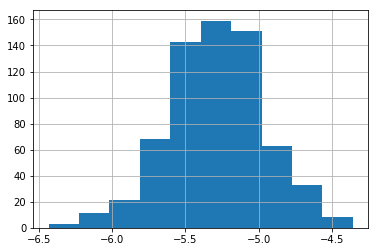

In [31]:
data['S1prime_sqrt']=np.log((data['S1prime']))
data['S1prime_sqrt'].hist()

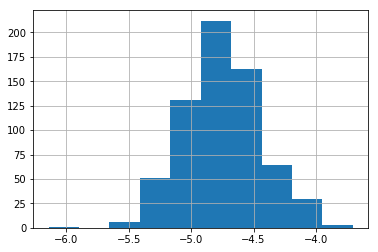

In [32]:
data['S2prime_sqrt']=np.log((data['S2prime']))
data['S2prime_sqrt'].hist()

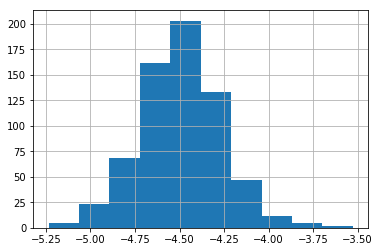

In [33]:
data['S3prime_sqrt'] = np.log(data['S3prime'])
data['S3prime_sqrt'].hist()

In [34]:
# only for the continous 
# another skewness test --> request skewness from pandas 
# and look at the histograms 
from scipy.stats import shapiro
stat, p = shapiro(data['S3prime_sqrt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.991, p=0.000
Sample does not look Gaussian (reject H0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4802e8d1d0>,
      dtype=object)

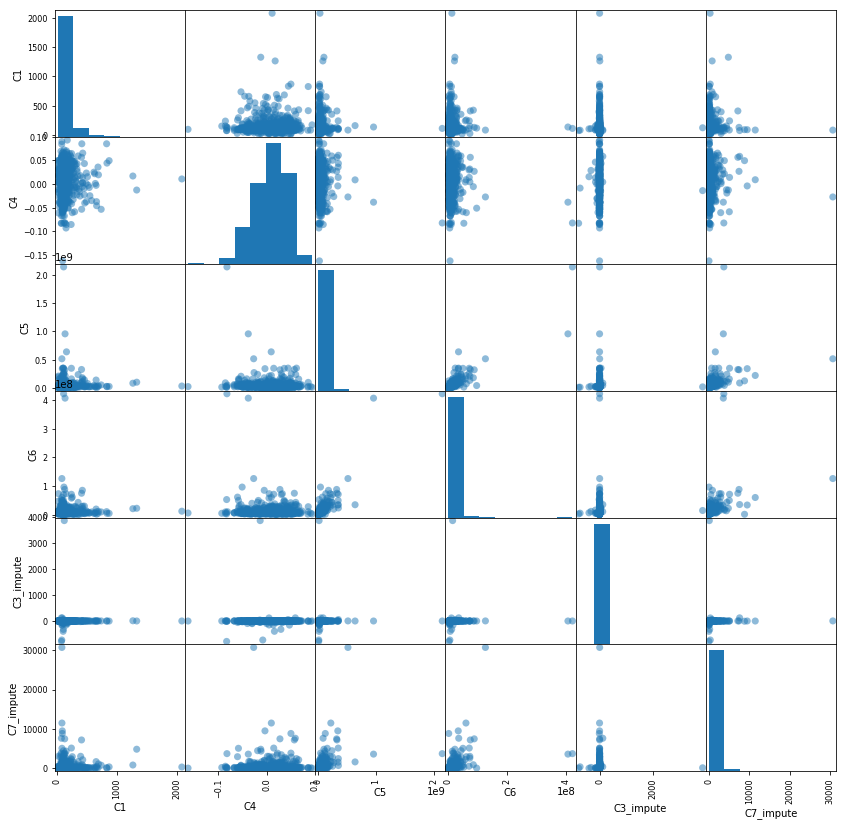

In [35]:
pd.plotting.scatter_matrix(data[['C1', 'C4',
       'C5', 'C6','C3_impute','C7_impute']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [36]:
data.columns

Index(['C1', 'C4', 'C5', 'C6', 'C3_impute', 'C7_impute', 'C5`', 'C6`',
       'T1prime', 'T2prime', 'T3prime', 'T4prime', 'T5prime', 'S1prime',
       'S2prime', 'S3prime', 'Y1', 'Y2', 'S1prime_sqrt', 'S2prime_sqrt',
       'S3prime_sqrt'],
      dtype='object')

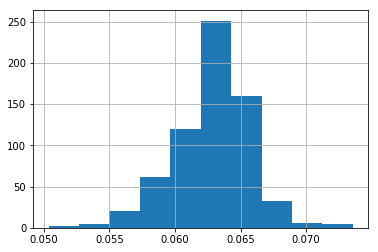

In [78]:
data['C6_norm']=1/(np.log(data['C6']))
data['C6_norm'].hist()

In [80]:
data['C6_norm'].skew()

-0.3936679536459565

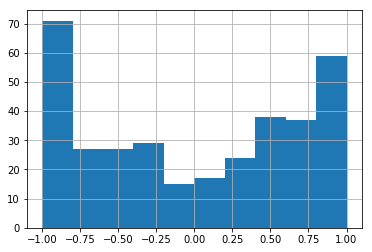

In [83]:
data['C3_norm']=np.tanh(data['C3_impute']+1)
data['C3_norm'].hist()

In [84]:
data['C3_norm'].skew()

-0.05853186707070183

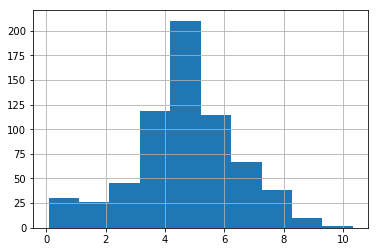

In [87]:
data['C7_norm']=np.log(data['C7_impute']+1)
data['C7_norm'].hist()

In [88]:
data['C7_norm'].skew()

-0.19508055631888138

In [ ]:
pd.plotting.scatter_matrix(data[['T1prime','T3prime', 'T4prime', 'T2prime','T5prime']], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [ ]:
# T1 looks good 

In [ ]:
# only for the continous 
# another skewness test --> request skewness from pandas 
# and look at the histograms 
from scipy.stats import shapiro
stat, p = shapiro(data['S1prime_sqrt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
# IQR, minmax, normalize, z-score 